In [1]:
### 일반 신경망
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

In [2]:
def traditional_nn(input_shape):
    input_tensor = Input(shape=input_shape)
    x = Dense(64, activation='relu')(input_tensor)
    x = Dense(64, activation='relu')(x)
    output_tensor = Dense(10, activation='softmax')(x)
    model = Model(inputs=input_tensor, outputs=output_tensor)
    return model

# 입력 텐서 정의
  # input_shape : 입력 데이터의 형태 지정 (784,) MNIST 데이터셋(28x28) 평탄화

# 1. 64개의 node, 활성화 함수 ReLU
# 2. 64개의 node, 활성화 함수 ReLU
# 3. 출력 10개의 node



In [3]:
# 모델 생성
model_traditional = traditional_nn((784,))
model_traditional.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [4]:
### ResNet
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, ReLU, Add, Flatten
from tensorflow.keras.models import Model

In [5]:


# 잔여 블록
def residual_block(x, filters, kernel_size=3):
    y = Conv2D(filters, kernel_size, padding='same')(x) # 입력 텐서 x에 대해 필터 수와 커널 크기를 지정한 컨볼루션 연산 수행
    y = BatchNormalization()(y) # 배치 정규화 -> 학습 안정화
    y = ReLU()(y)               # ReLU 활성화 함수 -> 비선형성
    y = Conv2D(filters, kernel_size, padding='same')(y) #  첫 번째 컨볼루션의 출력을 입력으로 받아 다시 컨볼루션 연산 수행
    y = BatchNormalization()(y)

    # 스킵 연결
    out = Add()([x, y])  # 입력 텐서 x와 두 번째 컨볼루션의 출력 y를 더함
    out = ReLU()(out)
    return out

# ResNet 모델 정의
def resnet(input_shape):
    input_tensor = Input(shape=input_shape)  # 입력 데이터의 형태 정의
    x = Conv2D(64, (3, 3), padding='same')(input_tensor) # 64 필터 갯수
    x = BatchNormalization()(x)
    x = ReLU()(x)

    # 잔차 블록 추가
    x = residual_block(x, 64) # 64: 필터 갯수
        # 잔차 블록 안... 두 개의 Conv2D 레이어와 BatchNormalization, ReLU를 거친 후,
        # 입력 x와 더해져 스킵 연결을 통해 최종 출력 out 생성
        # 최종 출력 out을 또 다른 잔차 블록으로 전달
    x = residual_block(x, 64) # x : Conv2D, BatchNormalization, ReLU를 거친 출력 텐서
        # 두개의 잔차 블록 더 복잡한 패턴을 학습, 기울기 소실 문제 완화


    # 출력층
    x = Flatten()(x) # 2D feature map을 1D 벡터로 변환
    x = Dense(10, activation='softmax')(x)

    model = Model(inputs=input_tensor, outputs=x)  # 입력과 출력을 지정하여 모델 정의
    return model

# 모델 생성
model_resnet = resnet((32, 32, 3))
model_resnet.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 32, 32, 64)   1792        ['input_2[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 32, 32, 64)  256         ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                                  
 re_lu (ReLU)                   (None, 32, 32, 64)   0           ['batch_normalization[0][0]

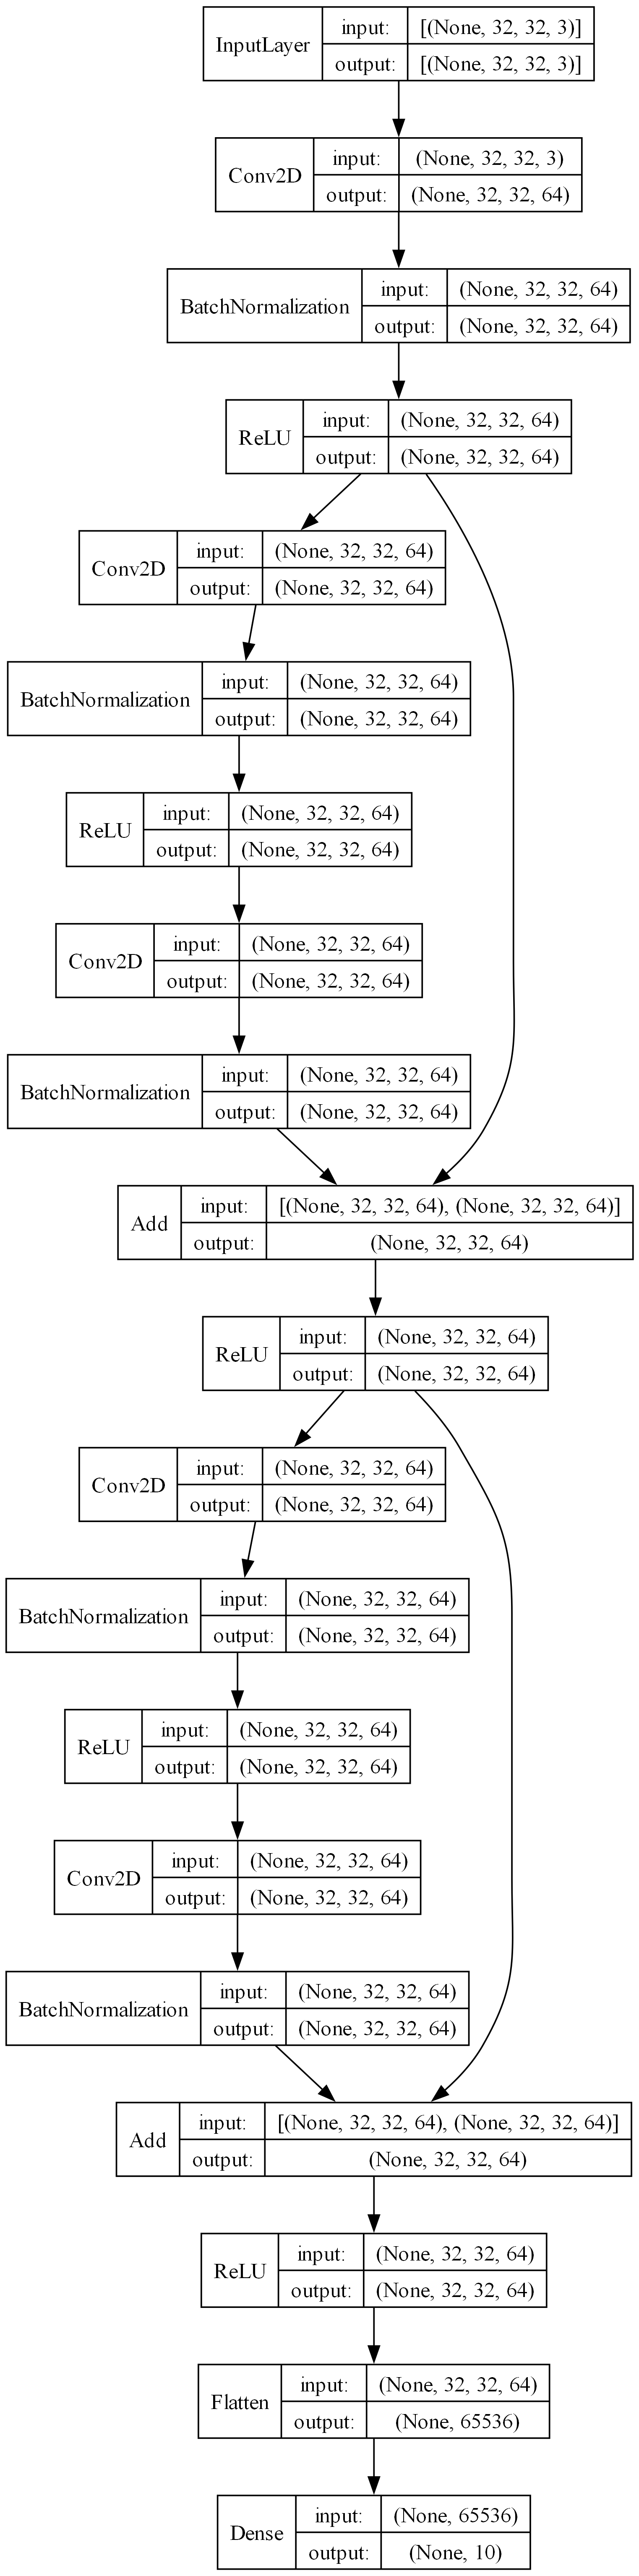

In [6]:
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model

plot_model(model_resnet, to_file="model.png", show_shapes=True, show_layer_names=False,
    rankdir="TB", expand_nested=False, dpi=266,
    show_layer_activations=False,)